In [1]:
!pip install d2l 
!pip install mxnet
import pandas as pd
import d2l
from mxnet import gluon, autograd, init, nd
from mxnet.gluon import nn
import random
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../data/dataCLean.csv', index_col = 0)

In [3]:
df.columns

Index(['SerialNumber', 'City', 'Name', 'longitude', 'latitude', 'FirstOnline',
       'Datetime', 'PM2.5', 'USAQI', 'CO2', 'Temperature', 'RelativeHumidity',
       'Outdoor PM2.5', 'OutdoorUSAQI', 'weekday', 'weekdayName', 'hour',
       'month', 'year', 'dayofmonth', 'tmpc', 'relh', 'drct', 'sped', 'vsby'],
      dtype='object')

In [4]:
drop_columns = ['SerialNumber', 'Name', 'longitude', 'latitude', 'FirstOnline', 'Outdoor PM2.5', 'OutdoorUSAQI']
dfs = df.sort_values('Datetime')
dfn = dfs.drop(drop_columns, axis = 1)
dfn = dfn.dropna()

dfn.head()

,City,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,weekday,weekdayName,hour,month,year,dayofmonth,tmpc,relh,drct,sped,vsby
8384,Karachi,2016-10-20 01:00:00,19.0,65,465.0,28.0,71.0,3,Thursday,1,10,2016,20,25.0,83.440,245.0,6.325,2.80
73271,Karachi,2016-10-20 01:00:00,21.0,70,415.0,25.0,80.0,3,Thursday,1,10,2016,20,25.0,83.440,245.0,6.325,2.80
23785,Karachi,2016-10-20 01:00:00,19.0,65,465.0,28.0,71.0,3,Thursday,1,10,2016,20,25.0,83.440,245.0,6.325,2.80
86064,Karachi,2016-10-20 01:00:00,21.0,70,415.0,25.0,80.0,3,Thursday,1,10,2016,20,25.0,83.440,245.0,6.325,2.80
73270,Karachi,2016-10-20 02:00:00,20.0,68,414.0,25.0,80.0,3,Thursday,2,10,2016,20,25.5,83.495,245.0,8.050,2.49


In [5]:
dfk = dfn[dfn.City == 'Karachi'].copy()
dfk.drop('City', inplace = True, axis = 1)
dfk.reset_index(inplace = True, drop = True)
one_hot = pd.get_dummies(dfk.weekdayName)
dfk = dfk.drop(['Datetime', 'weekday', 'weekdayName'], axis = 1)
dfk = (dfk - dfk.mean())/dfk.std()
dfk = dfk.join(one_hot)

dfk.head()

,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,hour,month,year,dayofmonth,tmpc,...,drct,sped,vsby,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,-0.270483,-0.445353,0.517778,0.087300,0.219741,-1.530530,1.601326,-2.536564,0.460941,-0.427032,...,0.480828,-0.482849,-0.875768,0,0,0,0,1,0,0
1,-0.260902,-0.412982,-0.225737,-0.721504,0.687110,-1.530530,1.601326,-2.536564,0.460941,-0.427032,...,0.480828,-0.482849,-0.875768,0,0,0,0,1,0,0
2,-0.270483,-0.445353,0.517778,0.087300,0.219741,-1.530530,1.601326,-2.536564,0.460941,-0.427032,...,0.480828,-0.482849,-0.875768,0,0,0,0,1,0,0
3,-0.260902,-0.412982,-0.225737,-0.721504,0.687110,-1.530530,1.601326,-2.536564,0.460941,-0.427032,...,0.480828,-0.482849,-0.875768,0,0,0,0,1,0,0
4,-0.265693,-0.425931,-0.240608,-0.721504,0.687110,-1.385856,1.601326,-2.536564,0.460941,-0.337387,...,0.480828,-0.162930,-1.328847,0,0,0,0,1,0,0


In [6]:
net = nn.Sequential()

In [7]:
net.add(nn.Dense(120,activation='sigmoid'),
        nn.Dense(40, activation='sigmoid'),
        nn.Dense(1)
)

In [8]:
batch_size=32

In [9]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
#    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)
        # The “take” function will then return the corresponding element based
        # on the indices

In [10]:
def train_test_split(df, l, ratio):
  num = int(len(df) * ratio)
  indices = list(df.index)
#  random.shuffle(indices)
  train = indices[:num]
  test = indices[num:]
  return df.iloc[train], df.iloc[test], l.iloc[train], l.iloc[test]

In [11]:
def eva(net, X, y, l, plot = False):
  y_hat = net(X)
  if plot:
    for i in range(0, min(len(y), 150), 50):
      plt.plot(y[i : i+50].asnumpy())
      plt.plot(y_hat[i : i+50].asnumpy())
      plt.show()
  return l(y_hat, y).mean().asscalar()


epoch number  0
traingin data loss	 0.027948909
testing data loss	 0.69772124
epoch number  1
traingin data loss	 0.016055845
testing data loss	 0.32317173
epoch number  2
traingin data loss	 0.012669133
testing data loss	 0.1995065
epoch number  3
traingin data loss	 0.014422998
testing data loss	 0.1475237
epoch number  4
traingin data loss	 0.016632397
testing data loss	 0.11206475
epoch number  5
traingin data loss	 0.01721426
testing data loss	 0.085459456
epoch number  6
traingin data loss	 0.016402232
testing data loss	 0.0653614
epoch number  7
traingin data loss	 0.014873884
testing data loss	 0.050370514
epoch number  8
traingin data loss	 0.013138954
testing data loss	 0.039364386
epoch number  9
traingin data loss	 0.01147345
testing data loss	 0.031386506
epoch number  10
traingin data loss	 0.009992651
testing data loss	 0.025650024
epoch number  11
traingin data loss	 0.008725441
testing data loss	 0.021539895
epoch number  12
traingin data loss	 0.007661313
testing data

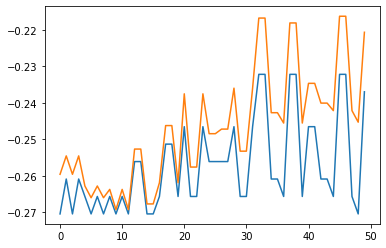

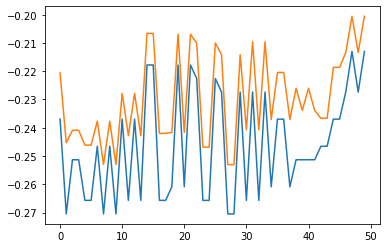

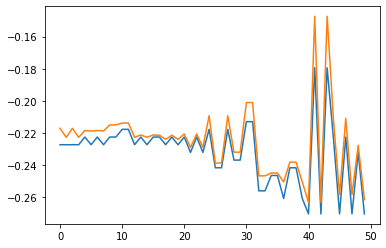

traingin data loss	 0.0010011886


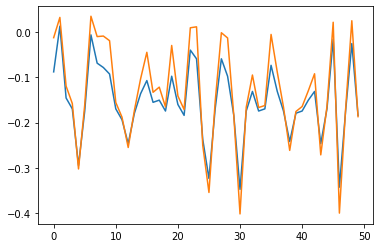

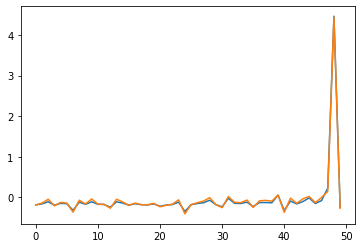

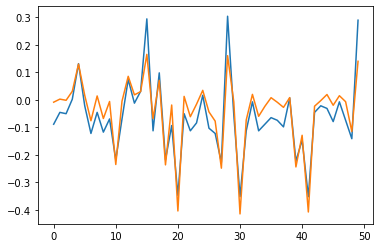

testing data loss	 0.0047097825


In [12]:
lr = 0.05
num_epochs = 100

features = dfk.drop('PM2.5', axis = 1)
labels = dfk['PM2.5']

random.seed(6)

tra_f, tes_f, tra_l, tes_l = train_test_split(features, labels, 0.6)
tra_f = nd.array(tra_f.to_numpy())
tes_f = nd.array(tes_f.to_numpy())
tra_l = nd.array(tra_l.to_numpy())
tes_l = nd.array(tes_l.to_numpy())


net.initialize(force_reinit=True,  init=init.Xavier())
loss = gluon.loss.L2Loss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size , tra_f, tra_l):
        with autograd.record():
            y_hat = net(X)
            l = loss(y_hat, y)
        l.backward()
        trainer.step(X.shape[0])
    print('epoch number ', epoch)
    print("traingin data loss\t", eva(net, tra_f, tra_l, loss, epoch == num_epochs - 1) )
    print("testing data loss\t", eva(net, tes_f, tes_l, loss, epoch == num_epochs - 1) )    